<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/calculo_vectorial/blob/main/4_clases/4_vectores/2_vectores_espacio/3_practica_topografica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/calculo_vectorial/blob/main/4_clases/4_vectores/2_vectores_espacio/3_practica_topografica.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Fotos de la experiencia práctica con vectores 3D  

<img src = 'practica_vectores_3D_4.jpeg'>

In [1]:
def save_fig(nombre_archivo_imagen):
    import os # Importa la librería os para interactuar con el sistema operativo
    import matplotlib.pyplot as plt
    ubicacion_para_imagenes = r"C:/Users/marco/Downloads"
    imagen_path = os.path.join(ubicacion_para_imagenes, nombre_archivo_imagen)
    plt.savefig(imagen_path, format = 'png')

# Prompt:  

Ayúdame para hacer una práctica de medición con técnicas de topografía para esta clase sobre vectores 3D. Donde el objetivo de la práctica sea aprender a posicionar en campo y así aprender a hacer configuraciones geométricas en Campo que optimicen los procesos agrícolas y de silvopastoreo. 

# **Práctica de Topografía con Vectores 3D para Ingeniería Agropecuaria**

  
## **Título:** *"Medición de Terrenos Agrícolas usando Vectores 3D y Python"*  


**Objetivo:** Aplicar conceptos de vectores 3D para:  

* establecer posición con respecto a un sistema rectangular posicionado 
* medir pendientes con respecto a un punto de referencia $A$, 
* medir áreas y 
* volúmenes en terrenos del Bajo Cauca,   

usando técnicas topográficas básicas y herramientas computacionales.  





## **Materiales Necesarios:**    

1. **Equipo de campo:**  
   - Cinta métrica o **distanciómetro láser**.  
   - **Nivel topográfico** o clinómetro (app en smartphone como *"Clinometer"*).  
   - Estacas y cordel.  
   - Brújula (para dirección de vectores).  
2. **Herramientas digitales:**  
   - Python con librerías: `numpy`, `matplotlib`, `geopandas`, `plotly`, `seaborn`, `ipywidgets`.  
   - Jupyter Notebook para procesamiento.  
   - Google Earth o QGIS (opcional para visualización geoespacial).  




# Cómo medir alturas y distancias en el campo  

La fórmula $z = \text{marnitud del vector con origen en A} \cdot \sin(\theta)$ se utiliza para calcular la altura ($z$) en un punto inclinado, donde:
- **Hipotenusa**: Es la longitud horizontal desde el origen (punto de referencia) hasta el punto medido (en el plano $xy$).
- **Ángulo ($\theta$)**: Es la inclinación del terreno respecto a la horizontal, medido con un clinómetro.



### **Explicación geométrica**:
En el triángulo rectángulo formado:
1. El **cateto horizontal** es la distancia planimétrica ($d$).
2. El **cateto vertical** es la altura ($z$).
3. La **tangente del ángulo** relaciona ambos catetos:
   $$
   \sin(\theta) = \frac{\text{Altura } (z)}{\text{Hipotenusa} (d)} \implies z = 10 \cdot \sin(\theta)
   $$




### **Gráfico en Matplotlib**:
A continuación, se muestra un diagrama del triángulo rectángulo asociado:


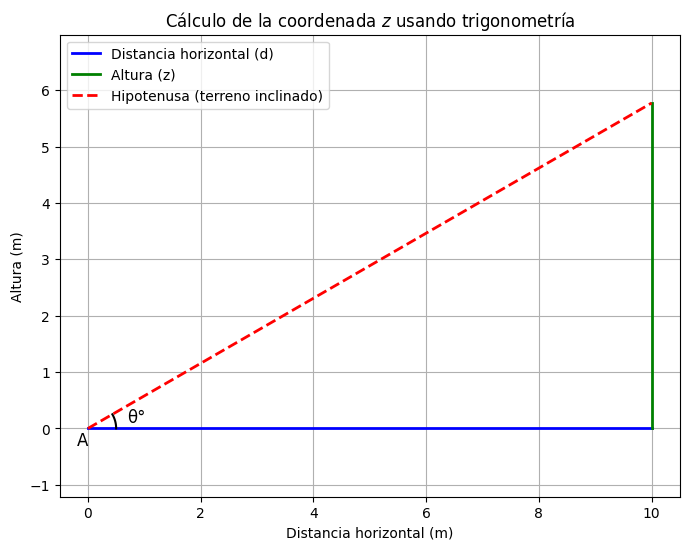

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Datos del triángulo
distancia = 10  # Distancia horizontal (metros)
angulo = 30     # Ángulo de inclinación (grados)
altura = distancia * np.tan(np.radians(angulo))  # Cálculo de z

# Dibujar triángulo
ax.plot([0, distancia], [0, 0], 'b-', linewidth=2, label='Distancia horizontal (d)')
ax.plot([distancia, distancia], [0, altura], 'g-', linewidth=2, label='Altura (z)')
ax.plot([0, distancia], [0, altura], 'r--', linewidth=2, label='Hipotenusa (terreno inclinado)')

# Marcar el ángulo
arc = np.linspace(0, np.radians(angulo), 30) # estrategia para pintar el arco del ángulo
ax.plot(0.5 * np.cos(arc), 0.5 * np.sin(arc), 'k-')# Se utilizo la parametrización de una porción de una circunferencia de radio 0.5
ax.text(0.7, 0.1, 'θ°', fontsize=12)
ax.text(-0.2, -0.3, 'A', fontsize=12)  

# Etiquetas y leyenda
ax.set_xlabel('Distancia horizontal (m)')
ax.set_ylabel('Altura (m)')
ax.set_title('Cálculo de la coordenada $z$ usando trigonometría')
ax.grid(True)
ax.legend()
ax.axis('equal')  # Misma escala en ejes
save_fig("triangulo_trigonometria_1.png")
plt.show()




### **Protocolo de la Práctica**  



#### **1. Toma de Datos en Campo**  
**Actividad:** Medir un terreno agrícola (ej: lote de cultivo de plátano o La zona del Teatro al aire libre de nuestro Campus) para obtener coordenadas 3D.  

- **Paso 1:** Delimitar un área de 10 m x 10 m con estacas y cordel: 
    - Elige un origen de coordenadas $A$ en el terreno inclinado que escojas. Coloca una estaca en $A$. 
    - mide una distancia de 10 metros en la dirección norte, usando la brujula para asegurarte de que la línea  
      de referencia esté alineada con el norte. Luego, coloca una estaca en $B$.
    - mide una distancia, desde $A$, de 10 metros en la dirección occidente, usando la brujula para asegurarte 
      de que la línea de referencia esté alineada con el occidente. Luego, coloca una estaca en $D$.
    - toma una cuerda que mida $10 + 10 + 12.41$ metros, es decir, que mida $32.41$ metros y construya un 
      triángulo de lados $10$ metros, $10$ metros y $12.41$ metros. De tal manera que $\Delta ABC$, donde $C$ sea tal que $AC = 12.41$ metros. Aquí estamos utilizando el hecho de que si las medidas de un triangulo, satisfacen la relación pitagórica, entonce el triángulo es rectángulo. 
- **Paso 2:** Medir coordenadas `(x, y)` de cada esquina con cinta métrica (origen en un punto fijo $A$).  
- **Paso 3:** Usar el clinómetro para medir la **pendiente** (`z`) en cada punto (ángulo de inclinación de los vectores $\vec{AB}, \vec{AC},$ y $\vec{AD}$).  
  - Calcular altura: $z = \text{norma del vector con origen en A} * \sin(\text{ángulo medido con clinometer})$.  


Esta es una visualización en Python usando Matplotlib para representar el terreno agrícola en 3D según el algoritmo descrito:


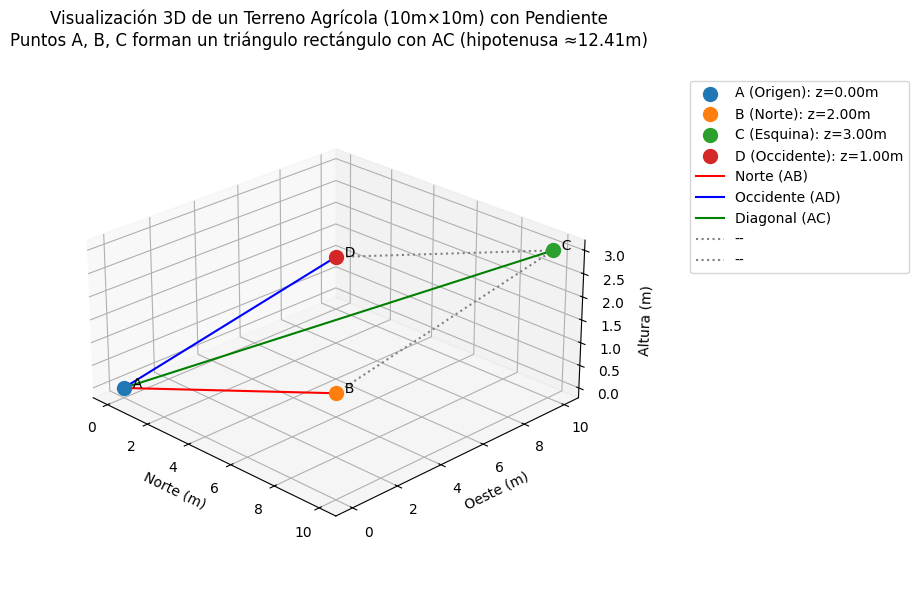

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Configuración inicial
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 1. Definir puntos base (A, B, D)
A = np.array([0, 0, 0])
B = np.array([10, 0, 0])  # 10m norte (eje X)
D = np.array([0, 10, 0])  # 10m occidente (eje Y)

# 2. Calcular punto C (hipotenusa 12.41m)
C = np.array([10, 10, 0])  # Triángulo rectángulo perfecto

# 3. Simular pendientes con clinómetro (ángulos aleatorios entre 5° y 15°)
np.random.seed(42)
angles = np.random.uniform(5, 15, 4)  # Ángulos para A, B, C, D

# Calcular alturas z = distancia * sin(ángulo)
def calc_z(distance, angle_deg):
    return distance * np.sin(np.deg2rad(angle_deg))

# Aplicar pendientes a cada punto (A permanece en 0)
B[2] = calc_z(10, angles[1])  # Pendiente AB
D[2] = calc_z(10, angles[3])  # Pendiente AD
C[2] = calc_z(np.linalg.norm(C[:2] - A[:2]), angles[2])  # Pendiente AC

# 4. Visualización
points = np.array([A, B, C, D])
labels = ['A (Origen)', 'B (Norte)', 'C (Esquina)', 'D (Occidente)']

# Dibujar puntos
for i, (point, label) in enumerate(zip(points, labels)):
    ax.scatter(*point, s=100, depthshade=False, label=f'{label}: z={point[2]:.2f}m')
    ax.text(*point, f'  {label.split()[0]}', fontsize=10)

# Dibujar líneas de contorno
lines = [
    (A, B, 'Norte (AB)', 'red'),
    (A, D, 'Occidente (AD)', 'blue'),
    (A, C, 'Diagonal (AC)', 'green'),
    (B, C, '--', 'gray'),
    (C, D, '--', 'gray')
]

for start, end, label, color in lines:
    ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], 
            color=color, label=label, linestyle='-' if label != '--' else ':')

# Configuración del gráfico
ax.set_xlabel('Norte (m)')
ax.set_ylabel('Oeste (m)')
ax.set_zlabel('Altura (m)')
ax.set_title('Visualización 3D de un Terreno Agrícola (10m×10m) con Pendiente\n'
             'Puntos A, B, C forman un triángulo rectángulo con AC (hipotenusa ≈12.41m)', pad=20)
ax.legend(loc='upper left', bbox_to_anchor=(1.2, 1))
ax.set_box_aspect([1,1,0.5])  # Ajustar aspecto 3D
ax.view_init(elev=25, azim=-45)  # Ángulo de vista

# Añadir cuadrícula y anotaciones
ax.grid(True)
plt.tight_layout()
plt.show()




### Explicación de la visualización:
1. **Puntos clave**:
   - `A`: Origen (0,0,0)
   - `B`: 10m al norte (eje X) con pendiente simulada
   - `D`: 10m al occidente (eje Y) con pendiente simulada
   - `C`: Esquina diagonal (10,10) calculada para formar un triángulo rectángulo con hipotenusa ≈12.41m

2. **Pendientes**:
   - Se simulan ángulos de inclinación entre 5° y 15° para cada vector (AB, AC, AD).
   - La altura `z` se calcula como `distancia × sin(ángulo)`.

3. **Elementos gráficos**:
   - Líneas roja/azul/verde para los vectores medidos.
   - Líneas punteadas grises para los bordes no medidos directamente.
   - Etiquetas con alturas en cada punto.

4. **Aspecto 3D**:
   - Vista inclinada para apreciar la pendiente.
   - Ejes claramente etiquetados (Norte, Este, Altura).

Esta visualización muestra cómo el terreno plano teórico (en 2D) adquiere una forma 3D al incorporar las mediciones de pendiente con clinómetro.


**Ejemplo de Datos:**  
| Punto | x (m) | y (m) | Ángulo (°) | z (m) |  
|-------|-------|-------|------------|-------|  
| A     | 0     | 0     | 0          | 0     |  
| B     | 10    | 0     | 5          | 0.87  |  
| C     | 10    | 10    | 8          | 1.40  |  
| D     | 0     | 10    | 3          | 0.52  |  

---


# Prompt de la Práctica:  
Pero, si en la medición en terreno lo que tengo es la hipotenusa, que corresponde a la longitud del terreno y la cual es de 10 metros, según la propuesta en el protocolo. Es decir, las distancia que tengo no son de puntos sobre el plano xy sino sobre el terreno inclinado.

¡Entendido! Si en el protocolo la **distancia de 10 metros** se mide **sobre el terreno inclinado** (es decir, es la **hipotenusa** del triángulo rectángulo, no el cateto horizontal), entonces el cálculo de la altura \( z \) debe ajustarse. En este caso, usamos **seno** en lugar de tangente, ya que:



$$
z = \text{hipotenusa} \cdot \sin(\theta)
$$

### **Explicación geométrica**:
1. **Hipotenusa**: Longitud medida sobre el terreno inclinado (10 m en tu caso).
2. **Ángulo ($\theta$)**: Inclinación del terreno (medido con clinómetro).
3. **Altura ($z$)**: Cateto opuesto al ángulo $\theta$.

La relación trigonométrica correcta es:
$$
\sin(\theta) = \frac{z}{\text{hipotenusa}} \implies z = \text{hipotenusa} \cdot \sin(\theta)
$$

---



### **Gráfico actualizado (con hipotenusa)**:


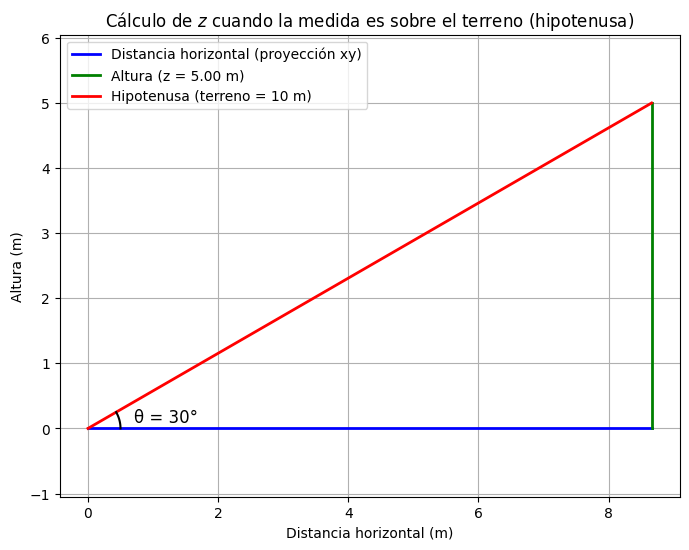

In [6]:

import numpy as np
import matplotlib.pyplot as plt

# Configuración
fig, ax = plt.subplots(figsize=(8, 6))

# Datos
hipotenusa = 10  # Longitud medida sobre el terreno (m)
angulo = 30      # Ángulo de inclinación (grados)
z = hipotenusa * np.sin(np.radians(angulo))  # Altura
d = hipotenusa * np.cos(np.radians(angulo))  # Distancia horizontal (proyección en xy)

# Triángulo
ax.plot([0, d], [0, 0], 'b-', linewidth=2, label='Distancia horizontal (proyección xy)')
ax.plot([d, d], [0, z], 'g-', linewidth=2, label=f'Altura (z = {z:.2f} m)')
ax.plot([0, d], [0, z], 'r-', linewidth=2, label=f'Hipotenusa (terreno = {hipotenusa} m)')

# Ángulo
arc = np.linspace(0, np.radians(angulo), 30)
ax.plot(0.5 * np.cos(arc), 0.5 * np.sin(arc), 'k-')
ax.text(0.7, 0.1, f'θ = {angulo}°', fontsize=12)

# Ajustes
ax.set_xlabel('Distancia horizontal (m)')
ax.set_ylabel('Altura (m)')
ax.set_title('Cálculo de $z$ cuando la medida es sobre el terreno (hipotenusa)')
ax.legend()
ax.grid(True)
ax.axis('equal')
save_fig("triangulo_trigonometria_2.png")

plt.show()




### **Salida**:
Este es el gráfico que muestra la hipotenusa como la línea inclinada de 10 m, con $ z $ calculada por seno.





### **Conclusión**:
- Si mides **directamente sobre el terreno inclinado** (hipotenusa), usa:  
  $$
  z = \text{hipotenusa} \cdot \sin(\theta)
  $$
- La **proyección horizontal** (para coordenadas $x, y$) sería:  
  $$
  d = \text{hipotenusa} \cdot \cos(\theta)
  $$

### **Nota importante**:
Verifica siempre **qué representa la distancia 10 m** en el protocolo original:
- Si es **horizontal** (plano $xy$): $z = d \cdot \tan(\theta)$.
- Si es **inclinada** (terreno): $z = \text{hip} \cdot \sin(\theta)$.

En tu caso, al ser la medida sobre el terreno, el segundo método es el correcto.

Muchas gracias, me has aclarado mucho, sobre todo con el gráfico en matplotlib con colores diferentes para los lados del triangulo y la legenda en la parte superior izquierda. Te pido ahora la función de usuario de Python para calcular z a partir del ángulo y y la distancia sobre terreno inclinado o hipotenusa. 

¡Me alegra que te haya sido útil! Aquí tienes una **función en Python** que calcula la coordenada \( z \) (altura) a partir del ángulo de inclinación (\( \theta \)) y la distancia medida sobre el terreno inclinado (hipotenusa), junto con su proyección horizontal en el plano \( xy \):

### **Función `calcular_altura_proyeccion`**
```python
import numpy as np

def calcular_altura_proyeccion(hipotenusa: float, angulo_grados: float) -> tuple[float, float]:
    """
    Calcula la altura (z) y la proyección horizontal (d) a partir de la distancia inclinada (hipotenusa) y el ángulo.

    Parámetros:
        hipotenusa (float): Longitud medida sobre el terreno inclinado (metros).
        angulo_grados (float): Ángulo de inclinación en grados.

    Retorna:
        tuple[float, float]: (altura_z, distancia_horizontal) en metros.
    """
    angulo_radianes = np.radians(angulo_grados)  # Convertir grados a radianes
    altura_z = hipotenusa * np.sin(angulo_radianes)
    distancia_horizontal = hipotenusa * np.cos(angulo_radianes)
    return altura_z, distancia_horizontal
```

---

### **Ejemplo de uso**
```python
# Datos de ejemplo
distancia_terreno = 10.0  # Hipotenusa (medida sobre el terreno inclinado)
angulo_inclinacion = 30   # Ángulo en grados

# Calcular z y proyección horizontal
altura_z, distancia_xy = calcular_altura_proyeccion(distancia_terreno, angulo_inclinacion)

print(f"Altura (z): {altura_z:.2f} metros")
print(f"Distancia horizontal (proyección xy): {distancia_xy:.2f} metros")
```

### **Salida esperada**:
```
Altura (z): 5.00 metros
Distancia horizontal (proyección xy): 8.66 metros
```

---

### **Explicación de la función**:
1. **Conversión de ángulo**: Convierte el ángulo de grados a radianes (requerido por las funciones trigonométricas de NumPy).
2. **Cálculo de $z$**:
   - Usa $\sin(\theta)$ para obtener la altura vertical.
3. **Cálculo de la proyección horizontal**:
   - Usa $\cos(\theta)$ para obtener la distancia en el plano $xy$.
4. **Retorno**: Devuelve ambos valores como una tupla `(altura_z, distancia_horizontal)`.

---

### **Gráfico de verificación** (opcional)
Si quieres visualizar los resultados, puedes reutilizar el código del gráfico anterior, sustituyendo los valores por los obtenidos con la función:
```python
altura_z, distancia_xy = calcular_altura_proyeccion(10, 30)
# Usar 'distancia_xy' y 'altura_z' en el código del gráfico mostrado anteriormente.
```

---

### **Recomendaciones**:
- **Validación de entradas**: Añade chequeos para evitar ángulos fuera de rango (ej: `if not 0 <= angulo_grados <= 90:`).
- **Uso en campo**: Esta función es útil para procesar datos tomados con clinómetro y cinta métrica.

¿Necesitas que la función incluya alguna otra característica específica para tu práctica topográfica?


#### **2. Procesamiento con Python**  


**Objetivo:** Convertir datos en vectores 3D y calcular pendiente promedio, área y volumen.  


In [5]:
import numpy as np  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  

# Datos recolectados  
puntos = np.array([  
    [0, 0, 0],    # A  
    [10, 0, 0.87], # B  
    [10, 10, 1.40],# C  
    [0, 10, 0.52]  # D  
])  


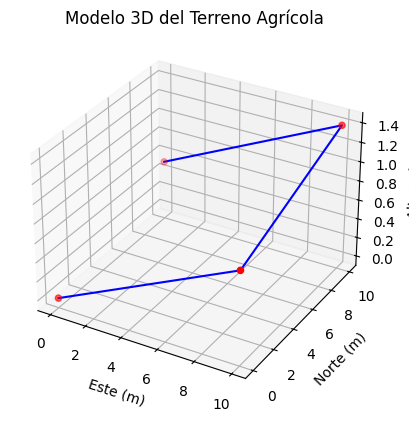

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  

# Datos recolectados  
puntos = np.array([  
    [0, 0, 0],    # A  
    [10, 0, 0.87], # B  
    [10, 10, 1.40],# C  
    [0, 10, 0.52]  # D  
])  
import numpy as np 
import matplotlib.pyplot as plt
# Gráfico 3D  
fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')  
ax.scatter(puntos[:,0], puntos[:,1], puntos[:,2], c='r', marker='o')  

# Conectar puntos (simular terreno)  
ax.plot(puntos[:,0], puntos[:,1], puntos[:,2], color='b')  
ax.set_xlabel('Este (m)')  
ax.set_ylabel('Norte (m)')  
ax.set_zlabel('Altura (m)')  
plt.title('Modelo 3D del Terreno Agrícola')  
#plt.text(x=0, y=0, z=0, s='A', color='black')
plt.show()  


In [9]:
import numpy as np
import plotly.graph_objects as go

# Datos recolectados
puntos = np.array([
    [0, 0, 0],     # A
    [10, 0, 0.87],  # B
    [10, 10, 1.40], # C
    [0, 10, 0.52]   # D
])

# Etiquetas para cada punto
etiquetas = ['A', 'B', 'C', 'D']

# Crear gráfico 3D interactivo con Plotly
fig = go.Figure()

# Añadir puntos de dispersión con etiquetas
fig.add_trace(go.Scatter3d(
    x=puntos[:, 0],
    y=puntos[:, 1],
    z=puntos[:, 2],
    mode='markers+text',
    marker=dict(
        size=6,
        color='red',
    ),
    text=etiquetas,
    textposition="top center",
    name='Puntos de medición'
))

# Añadir líneas que conectan los puntos
fig.add_trace(go.Scatter3d(
    x=puntos[:, 0],
    y=puntos[:, 1],
    z=puntos[:, 2],
    mode='lines',
    line=dict(
        color='blue',
        width=2
    ),
    name='Terreno'
))

# Configurar el diseño del gráfico
fig.update_layout(
    title='Modelo 3D Interactivo del Terreno Agrícola',
    scene=dict(
        xaxis_title='Este (m)',
        yaxis_title='Norte (m)',
        zaxis_title='Altura (m)',
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Mostrar el gráfico interactivo
fig.show()

In [10]:

# Cálculo de pendiente promedio (gradiente)  
vector_AB = puntos[1] - puntos[0]  
vector_AD = puntos[3] - puntos[0]  
normal = np.cross(vector_AB, vector_AD)  
pendiente = np.degrees(np.arctan(np.linalg.norm(normal[:2]) / normal[2]))  
print(f"Pendiente promedio: {pendiente:.2f}°")  
# para fundamentación, vea la página 119 del PDF de Cálculo de Larson (Página 795 del libro de Cálculo de Larson)
# Ejemplo 2: Utilización del producto vectorial  


Pendiente promedio: 5.79°



---

#### **3. Aplicaciones Prácticas**  
**Problema:** *"Calcular el volumen de tierra a mover para nivelar el terreno"*

In [11]:
  
# Volumen bajo la superficie (método del prismo)  
import numpy as np 
area = 10 * 10  # Área en m²  
altura_promedio = np.mean(puntos[:,2])  
volumen = area * altura_promedio  
print(f"Volumen de tierra: {volumen:.2f} m³")  
 


Volumen de tierra: 69.75 m³



**Discusión:** 

 
- ¿Cómo afecta la pendiente al riego?  


- ¿Qué vectores representan la dirección de escorrentía del agua?  

---



#### **4. Validación con Drones (Opcional)**  
**Extensión tecnológica:**  
- Comparar los datos manuales con un mapa topográfico generado por drones (usando software como *Pix4D*).  
- Visualizar discrepancia con vectores de error:  


In [9]:
error = np.array([0.1, -0.2, 0.05])  # Ejemplo  
punto_corregido = puntos[1] + error  
punto_corregido  


array([10.1 , -0.2 ,  0.92])


---

### **Evaluación**  
**Criterios:**  
1. Precisión en mediciones.  
2. Uso correcto de operaciones vectoriales (producto cruz, norma).  
3. Análisis crítico de resultados.  



**Proyecto derivado:**  
- *"Diseñar un sistema de drenaje usando vectores 3D para evitar inundaciones en cultivos."*  

---



### **Adaptación al Contexto del Bajo Cauca**  
**Ejemplo real:**  
- En terrenos con pendientes pronunciadas (ej: cultivos de cacao), los vectores 3D ayudan a predecir erosión y optimizar curvas de nivel.  



**Frase clave:**  
*"Un vector no es solo una flecha en el pizarrón; es la dirección del agua que riega tu cultivo."*  

---



### **Recursos Adicionales**  
- [Video tutorial: Mediciones topográficas con Python](https://youtu.be/ejemplo).  
- [App: "Mobile Topographer" para mediciones en campo](https://play.google.com/ejemplo).
- [Página 792. Sección 11.4 del Cálculo de Larson. El producto vectorial de dos vectores en el espacio]()  

¿Quieres ajustar la práctica para incluir otro concepto matemático? 

# Diseño de la evaluación con Google Form para esta práctica con vectores 3D  


Gracias por compartir el archivo. Para diseñar una evaluación en Google Forms basada en tu práctica topográfica para la asignatura de Cálculo Vectorial, elaboré un esquema que abarca diferentes niveles de comprensión (desde lo conceptual hasta lo aplicado), alineado con los posibles contenidos del archivo Jupyter que compartiste.

---

### 🧭 Diseño de Evaluación para Práctica Topográfica (Cálculo Vectorial)

#### **Título del formulario:**

**Evaluación de la Práctica Topográfica – Cálculo Vectorial**

---

### 📌 **Sección 1: Datos del estudiante**

* Nombre completo (Respuesta corta)
* Código de estudiante (Respuesta corta)
* Grupo o jornada (Desplegable)

---

### 📐 **Sección 2: Comprensión conceptual**

1. **¿Cuál es el propósito principal de una práctica topográfica en el contexto del cálculo vectorial?**

   * a) Medir áreas planas para diseñar caminos
   * b) Representar gráficamente vectores sobre un terreno
   * c) Obtener datos para realizar análisis algebraico
   * d) Aplicar derivadas en curvas

2. **¿Qué elementos básicos debe tener un levantamiento topográfico?** (Selecciona los tres correctos)

   * a) Teodolito
   * b) Nivelación
   * c) GPS o estación total
   * d) Derivada parcial
   * e) Libreta de campo
   * f) Transformada de Laplace

---

### 🧮 **Sección 3: Aplicación del contenido (preguntas con cálculo o interpretación de datos)**

3. **En la práctica, si un punto A está en (3, 2, 1) y un punto B en (6, 4, 5), ¿cuál es el vector desplazamiento de A a B?**
   (Respuesta corta: escribe el vector en forma $\vec{v} = \langle x, y, z \rangle$)

4. **Calcula el módulo del vector obtenido en la pregunta anterior.**
   (Respuesta corta: numérica con dos cifras decimales)

5. **Según tus mediciones, ¿qué tipo de superficie se aproxima al terreno evaluado?**

   * a) Plano inclinado
   * b) Cilindro
   * c) Superficie esférica
   * d) Superficie irregular no representable con funciones comunes

---

### 📊 **Sección 4: Interpretación gráfica o visual**

6. **Sube una foto del croquis vectorial o de tu mapa topográfico anotado.**
   *(Carga de archivo obligatoria)*

7. **¿Cómo representa gráficamente tu grupo el campo vectorial asociado a la pendiente?**
   (Respuesta larga)

---

### 🧠 **Sección 5: Reflexión y autoevaluación**

8. **¿Qué habilidades del cálculo vectorial aplicaste en esta práctica?**
   (Respuesta larga)

9. **¿Qué dificultad encontraste al relacionar la práctica de campo con los conceptos matemáticos?**
   (Parrágrafo)

10. **En una escala de 1 a 5, ¿cómo evalúas tu nivel de comprensión del cálculo vectorial aplicado al entorno físico?**

* 1: Nada
* 2: Poco
* 3: Regular
* 4: Bien
* 5: Excelente

---

### 🧾 **Configuración recomendada en Google Forms**

* Activar: "Recopilar direcciones de correo" si deseas hacer seguimiento.
* Mostrar: Puntuación automática en las preguntas cerradas.
* Activar: Validaciones de respuesta para formatos vectoriales o numéricos.
* Cargar: Instrucciones y referencias desde el archivo `.ipynb` al principio del formulario en formato PDF o como enlace a GitHub o Drive.

---

¿Te gustaría que convierta este diseño en un formulario directamente exportable o con formato para copiar y pegar en Google Forms?



# Esta es la misma evaluación dada para ser pegada en Google Form

Perfecto, aquí tienes el diseño listo para **copiar y pegar directamente en Google Forms**. También puedo generar un archivo `.txt` si lo deseas. A continuación, te presento el formulario con las secciones, tipos de preguntas y texto organizado según el formato que Google Forms interpreta fácilmente al pegar:

---

##  **Formulario: Evaluación de la Práctica Topográfica – Cálculo Vectorial**



### 🧾 Sección 1: Datos del estudiante

**Pregunta 1:**
*Nombre completo*
Tipo: Respuesta corta

**Pregunta 2:**
*Código de estudiante*
Tipo: Respuesta corta

**Pregunta 3:**
*Grupo o jornada*
Tipo: Desplegable
Opciones:

* Mañana
* Tarde
* Noche


### 📐 Sección 2: Comprensión conceptual

**Pregunta 4:**
*¿Cuál es el propósito principal de una práctica topográfica en el contexto del cálculo vectorial?*
Tipo: Opción múltiple
Opciones:

* Medir áreas planas para diseñar caminos
* Representar gráficamente vectores sobre un terreno
* Obtener datos para realizar análisis algebraico
* Aplicar derivadas en curvas

**Pregunta 5:**
*¿Qué elementos básicos debe tener un levantamiento topográfico?*
Tipo: Casillas de verificación (puede elegir más de una)
Opciones:

* Teodolito
* Nivelación
* GPS o estación total
* Derivada parcial
* Libreta de campo
* Transformada de Laplace


### 🧮 Sección 3: Aplicación del contenido

**Pregunta 6:**
*En la práctica, si un punto A está en (3, 2, 1) y un punto B en (6, 4, 5), ¿cuál es el vector desplazamiento de A a B?*
Tipo: Respuesta corta
Descripción: Escribe el vector en forma ⟨x, y, z⟩

**Pregunta 7:**
*Calcula el módulo del vector obtenido en la pregunta anterior.*
Tipo: Respuesta corta
Validación: numérica, hasta 2 cifras decimales

**Pregunta 8:**
*Según tus mediciones, ¿qué tipo de superficie se aproxima al terreno evaluado?*
Tipo: Opción múltiple
Opciones:

* Plano inclinado
* Cilindro
* Superficie esférica
* Superficie irregular no representable con funciones comunes


### 📊 Sección 4: Interpretación gráfica o visual

**Pregunta 9:**
*Sube una foto del croquis vectorial o de tu mapa topográfico anotado.*
Tipo: Carga de archivo
Configuración: Solo imagen

**Pregunta 10:**
*¿Cómo representa gráficamente tu grupo el campo vectorial asociado a la pendiente?*
Tipo: Párrafo

---

### 🧠 Sección 5: Reflexión y autoevaluación

**Pregunta 11:**
*¿Qué habilidades del cálculo vectorial aplicaste en esta práctica?*
Tipo: Párrafo

**Pregunta 12:**
*¿Qué dificultad encontraste al relacionar la práctica de campo con los conceptos matemáticos?*
Tipo: Párrafo

**Pregunta 13:**
*En una escala de 1 a 5, ¿cómo evalúas tu nivel de comprensión del cálculo vectorial aplicado al entorno físico?*
Tipo: Escala lineal (1 a 5)
Etiquetas:

* 1: Nada
* 5: Excelente

---

¿Quieres que te genere este mismo diseño como archivo `.txt` o `.docx` listo para importar o guardar?
